# ML Exercise 1 - Eucalyptus

In [103]:
# imports
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.io.arff import loadarff

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

## Exploratory Data Analysis

In [104]:
# Load learn data
raw_data = loadarff("dataset_194_eucalyptus.arff");
df = pd.DataFrame(raw_data[0])

In [105]:
df.head()

,Abbrev,Rep,Locality,Map_Ref,Latitude,Altitude,Rainfall,Frosts,Year,Sp,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,b'Cra',1.0,b'Central_Hawkes_Bay',b'N135_382/137',b'39__38',100.0,850.0,-2.0,1980.0,b'co',1520.0,18.45,9.96,40.0,4.0,3.0,3.5,4.0,3.5,b'good'
1,b'Cra',1.0,b'Central_Hawkes_Bay',b'N135_382/137',b'39__38',100.0,850.0,-2.0,1980.0,b'fr',1487.0,13.15,9.65,90.0,4.5,4.0,3.5,3.5,3.0,b'best'
2,b'Cra',1.0,b'Central_Hawkes_Bay',b'N135_382/137',b'39__38',100.0,850.0,-2.0,1980.0,b'ma',1362.0,10.32,6.50,50.0,2.3,2.5,3.0,3.5,3.0,b'low'
3,b'Cra',1.0,b'Central_Hawkes_Bay',b'N135_382/137',b'39__38',100.0,850.0,-2.0,1980.0,b'nd',1596.0,14.80,9.48,70.0,3.7,3.0,3.3,4.0,3.5,b'good'
4,b'Cra',1.0,b'Central_Hawkes_Bay',b'N135_382/137',b'39__38',100.0,850.0,-2.0,1980.0,b'ni',2088.0,14.50,10.78,90.0,4.0,2.7,3.3,3.0,3.0,b'good'


In [106]:
# 736 instances, 20 features
df.shape

(736, 20)

In [107]:
# check for duplicates
len(df.drop_duplicates())

736

-> no duplicates

In [108]:
# we have some instances with missing values
df.isna().sum()

Abbrev       0
Rep          0
Locality     0
Map_Ref      0
Latitude     0
Altitude     0
Rainfall     0
Frosts       0
Year         0
Sp           0
PMCno        7
DBH          1
Ht           1
Surv        94
Vig         69
Ins_res     69
Stem_Fm     69
Crown_Fm    69
Brnch_Fm    69
Utility      0
dtype: int64

In [109]:
uniq_classes = df['Utility'].unique()

print(uniq_classes)
print("\nNumber of unique classes: ", len(uniq_classes))

[b'good' b'best' b'low' b'average' b'none']

Number of unique classes:  5


In [110]:
#count unique values in each column
df.nunique()

Abbrev       16
Rep           4
Locality      8
Map_Ref      14
Latitude     12
Altitude      9
Rainfall     10
Frosts        2
Year          5
Sp           27
PMCno        85
DBH         603
Ht          531
Surv         47
Vig          33
Ins_res      28
Stem_Fm      26
Crown_Fm     29
Brnch_Fm     28
Utility       5
dtype: int64

Statistics:

- number of instances: 736
- number of features: 20
- number of classes: 5
- number of missing values: 448
- number of instances with missing values: 95
- number of numeric features: 14
- number of symbolic features: 6

Dataset contains numeric and nominal data types.

C:\Users\stefa\AppData\Local\Temp\ipykernel_13496\2225569098.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\stefa\AppData\Local\Temp\ipykernel_13496\2225569098.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot: >

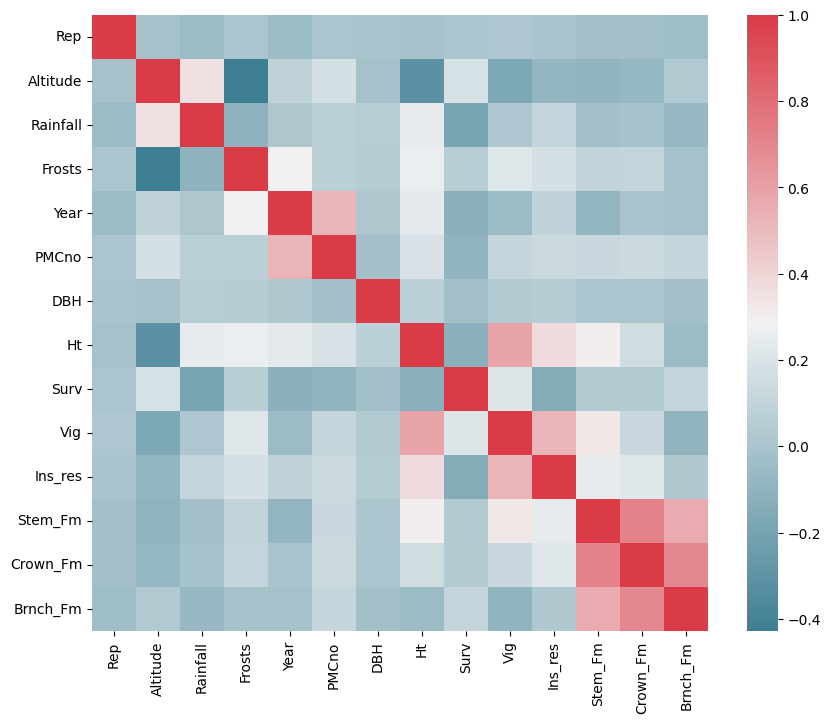

In [111]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

b'good'       214
b'none'       180
b'average'    130
b'low'        107
b'best'       105
Name: Utility, dtype: int64

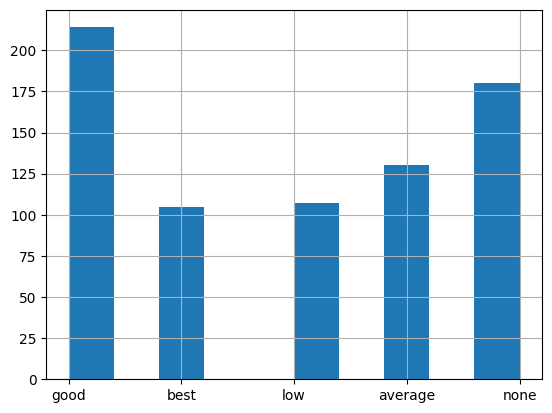

In [112]:
# check class distribution
df['Utility'].hist()

df['Utility'].value_counts()

## Preprocessing

In [113]:
# import libs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder

In [114]:
nominal_features = ["Abbrev", "Locality", "Map_Ref", "Latitude", "Sp"]
numeric_features = ["Rep", "Altitude", "Rainfall", "Frosts", "Year", "PMCno", "DBH", 
                    "Ht", "Surv", "Vig", "Ins_res", "Stem_Fm", "Crown_Fm", "Brnch_Fm"]

#### Drop instances with missing values

In [115]:
df = df.dropna()

# 736 -> 641 instances
df.shape

(641, 20)

<AxesSubplot: >

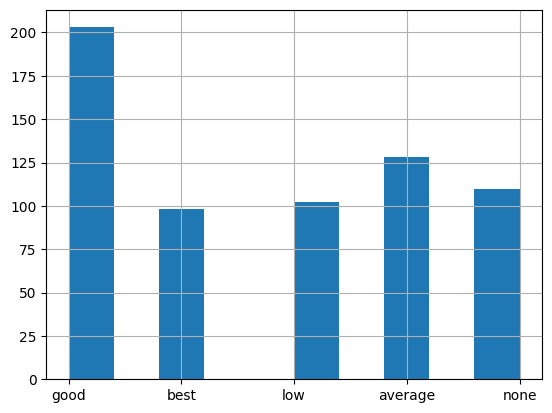

In [116]:
# class distribution after dropping NA
df['Utility'].hist()

#### Split features and labels

In [117]:
X = df.drop(columns=['Utility'])
y = df['Utility']

#### Feature selection

In [118]:
# probably feature selection would improve the performance

#### Encoding

In [119]:
# transform all nominal features using one-hot encoding technique
one_hot = pd.get_dummies(X[nominal_features])
X = X.drop(columns=nominal_features)
X = X.join(one_hot)

In [120]:
# apply multi labeled encoder for classes (because it is multi-class prediction)
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)

In [121]:
X.shape

(641, 78)

In [122]:
y[0]

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

#### Split train and test data

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Scaling

do scaling of numeric values

it is also recommended to do scaling before using PCA

Also scaling is needed for the algorithms relying on distance (kNN)

In [32]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [129]:
mms = MinMaxScaler();

X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [64]:
rs = RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

#### PCA

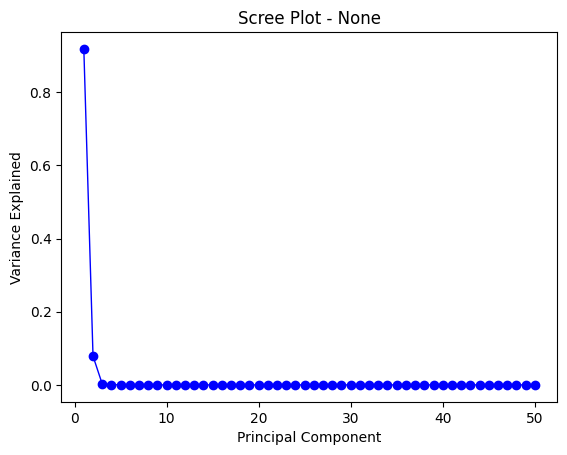

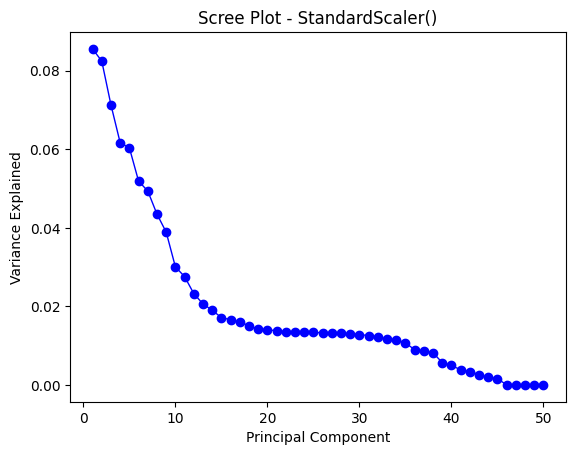

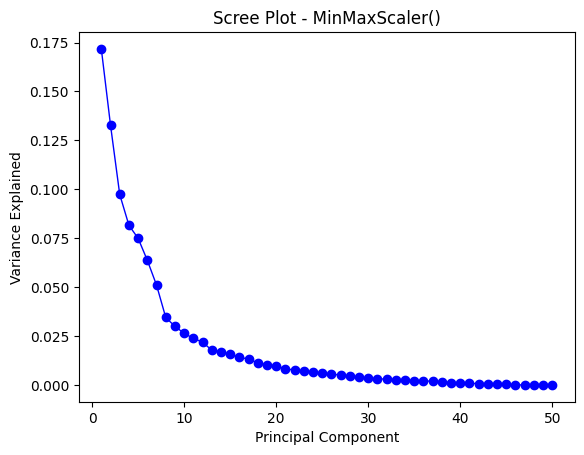

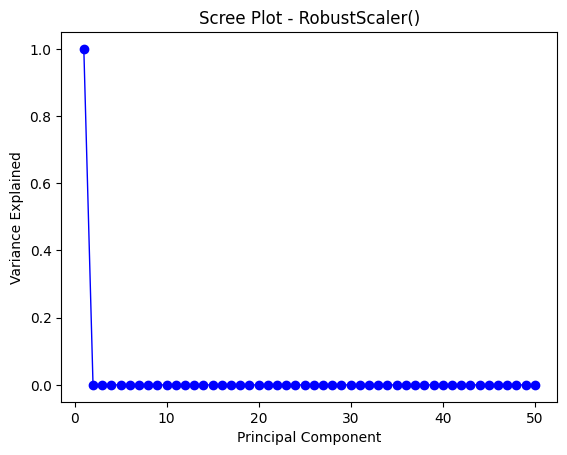

In [125]:
scalers = [None, sc, mms, rs]
n_comp = 50

for scaler in scalers:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    if scaler != None:
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    pca = PCA(n_components=n_comp)

    # fit only train data
    pca.fit(X_train)
    
    pc_values = np.arange(pca.n_components_) + 1

    plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth=1, color='blue')
    plt.title('Scree Plot - ' + str(scaler))
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.show()

MinMaxScaler & StandardScaler:
- From the plot based on feature variance, it can be seen that first 45 components bring some value, having more features will put noisy features in the model

In [ ]:
# remove noisy features using PCA

pca = PCA(n_components=45)

pca.fit(X_train)

# apply trained PCA on trained and test data
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

## Model Development

Do hypterparameter tuning on different classifiers using randomized search CV algorithm in order to find best model parameters

In [130]:
# import libraries from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

#### KNN

In [131]:
knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15]
}

knn_search = RandomizedSearchCV(knn, knn_params, n_iter=7, scoring='accuracy', n_jobs=-1, cv=5)
knn_result = knn_search.fit(X_train, y_train)

In [132]:
print('Best Score: %s' % knn_result.best_score_)
print('Best Hyperparameters: %s' % knn_result.best_params_)

Best Score: 0.3973533083645443
Best Hyperparameters: {'n_neighbors': 3}


In [133]:
y_pred = knn_search.predict(X_test)

print("Accurracy: ", accuracy_score(y_test, y_pred))

Accurracy:  0.41968911917098445


Results:

- performs better when using standard scaling then nothing (32% accuracy)
- perform better with min-max scaling than standard scaling (42% accuracy)
- Adding PCA doesn't improve performance (39% accuracy)
- best performance when using RobustScaler (48%)

In all cases: k = 3 is the best value

#### Random Forest

In [134]:
rf = RandomForestClassifier()

rf_params = {
    'n_estimators': [100, 125, 150, 175, 200, 250, 300, 350],
    'class_weight': [None, 'balanced_subsample', 'balanced'],
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': [None, 5, 7, 9, 11, 13, 15]
}

rf_search = RandomizedSearchCV(rf, rf_params, n_iter=15, scoring='accuracy', n_jobs=-1, cv=5)
rf_result = rf_search.fit(X_train, y_train)

In [135]:
print('Best Score: %s' % rf_result.best_score_)
print('Best Hyperparameters: %s' % rf_result.best_params_)

Best Score: 0.4060674157303371
Best Hyperparameters: {'n_estimators': 100, 'max_depth': 15, 'criterion': 'log_loss', 'class_weight': None}


In [136]:
y_pred = rf_search.predict(X_test)

print("Accurracy: ", accuracy_score(y_test, y_pred))

Accurracy:  0.43523316062176165


Results:

- Standard Scaling - 41% accuracy
- Min Max Scaling - 43% accuracy
- Standard + PCA - 27% accuracy
- RobustScaler - 42%

Text(0.5, 1.0, 'Importance of attributes in RF Classifier')

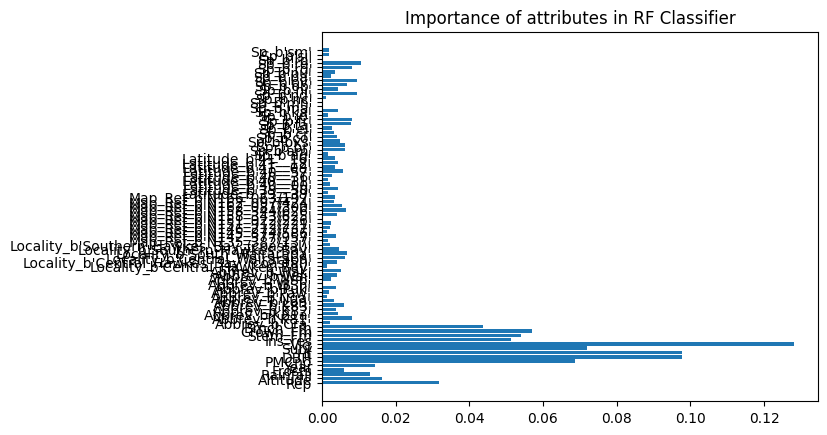

In [137]:
# creating the rf model, to plot the importance of attributes

model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

plt.barh(X.columns, model.feature_importances_)
plt.rcParams["figure.figsize"] = (60,30)
plt.title("Importance of attributes in RF Classifier")

#### MLP

In [138]:
mlp = MLPClassifier()

mlp_params = {
    'hidden_layer_sizes': [(400, 200), (300, 150), (200, 100), (400), (300), (200), (100)],
    'alpha': [0.0001, 0.0002, 0.0003],
    'learning_rate_init': [0.001, 0.002, 0.003],
    'max_iter': [1000],
    'activation' : ['relu', 'tanh', 'identity', 'logistic'],
    'solver': ['adam', 'lbfgs']
}

mlp_search = RandomizedSearchCV(mlp, mlp_params, n_iter=15, scoring='accuracy', n_jobs=-1, cv=5)
mlp_result = mlp_search.fit(X_train, y_train)

In [139]:
print('Best Score: %s' % mlp_result.best_score_)
print('Best Hyperparameters: %s' % mlp_result.best_params_)

Best Score: 0.549063670411985
Best Hyperparameters: {'solver': 'adam', 'max_iter': 1000, 'learning_rate_init': 0.003, 'hidden_layer_sizes': (300, 150), 'alpha': 0.0001, 'activation': 'logistic'}


In [140]:
y_pred = mlp_search.predict(X_test)

print("Accurracy: ", accuracy_score(y_test, y_pred))

Accurracy:  0.5440414507772021


## Model Comparison

In [142]:
# impor libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [143]:
cols = ["algorithm", "scaler", "val", "accuracy", "precision", "recall", "f1", "elapsed_time (sec)"]
results = pd.DataFrame(columns = cols)

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    RandomForestClassifier(n_estimators=200),
    MLPClassifier(solver='adam',
                  hidden_layer_sizes=(200, 100),
                  activation='tanh',
                  learning_rate_init=0.003,
                  max_iter=1000)
]

scalers = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
    PCA(n_components=45),
    None
]

validation = ['cv', 'holdout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for classifier in classifiers:
    for scaler in scalers:
        for validation_method in validation:
            steps = [
                ('scaler', scaler),
                ('clf', classifier)
            ]
            
            pipeline = Pipeline(steps)
            algorithm = classifier
            
            if validation_method == 'holdout':
                # --------------------------------
                st = time.time()
                # ------------
                pipeline.fit(X_train, y_train)   
                # ------------
                et = time.time()
                # --------------------------------

                y_pred = pipeline.predict(X_test)

                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
                recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
                f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
                elapsed_time = et - st

                new_row = pd.DataFrame({
                    "algorithm": str(algorithm),
                    "scaler": str(scaler),
                    "val": 'holdout',
                    "accuracy": accuracy,
                    "precision":precision,
                    "recall":recall,
                    "f1": f1,
                    "elapsed_time (sec)": elapsed_time}, index=[0])

                results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)
                
            elif validation_method == 'cv':
                # --------------------------------
                st = time.time()
                # ------------
                accuracy_scores = cross_val_score(pipeline, X, y, cv=5, scoring="accuracy")
                # ------------
                et = time.time()
                # --------------------------------
                
                elapsed_time = et - st
                
                precision_scores = cross_val_score(pipeline, X, y, cv=5, scoring=make_scorer(precision_score, average='macro', zero_division=0))
                recall_scores = cross_val_score(pipeline, X, y, cv=5, scoring=make_scorer(recall_score, average='macro', zero_division=0))
                f1_scores = cross_val_score(pipeline, X, y, cv=5, scoring=make_scorer(f1_score, average='macro', zero_division=0))
                
                new_row = pd.DataFrame({
                    "algorithm": str(algorithm),
                    "scaler": str(scaler),
                    "val": 'cv',
                    "accuracy": accuracy_scores.mean(),
                    "precision":precision_scores.mean(),
                    "recall":recall_scores.mean(),
                    "f1": f1_scores.mean(),
                    "elapsed_time (sec)": elapsed_time}, index=[0])
                
                results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)

D:\TU Wien\Semester 3\ML\Assignement 1\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [144]:
results.sort_values(by="accuracy", ascending=False)

,algorithm,scaler,val,accuracy,precision,recall,f1,elapsed_time (sec)
4,"MLPClassifier(activation='tanh', hidden_layer_...",RobustScaler(),holdout,0.518135,0.630261,0.564297,0.589857,6.322698
24,KNeighborsClassifier(n_neighbors=3),RobustScaler(),holdout,0.487047,0.551077,0.477878,0.507194,0.011012
6,"MLPClassifier(activation='tanh', hidden_layer_...",MinMaxScaler(),holdout,0.481865,0.583033,0.514235,0.541287,4.454629
8,"MLPClassifier(activation='tanh', hidden_layer_...",StandardScaler(),holdout,0.481865,0.551611,0.489844,0.510643,4.789849
18,RandomForestClassifier(n_estimators=200),StandardScaler(),holdout,0.430052,0.721356,0.433911,0.505793,0.438989
16,RandomForestClassifier(n_estimators=200),MinMaxScaler(),holdout,0.419689,0.666565,0.416890,0.470702,0.437179
26,KNeighborsClassifier(n_neighbors=3),MinMaxScaler(),holdout,0.419689,0.489491,0.400930,0.431224,0.003000
5,"MLPClassifier(activation='tanh', hidden_layer_...",RobustScaler(),cv,0.411967,0.489871,0.528464,0.480589,30.507991
14,RandomForestClassifier(n_estimators=200),RobustScaler(),holdout,0.404145,0.705119,0.414463,0.480547,0.446356
10,RandomForestClassifier(n_estimators=200),None,holdout,0.398964,0.716562,0.414035,0.481481,0.430000
